In [280]:
#Пункт 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

In [113]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [115]:
for line in data:
    print line.strip()

Height
Weight


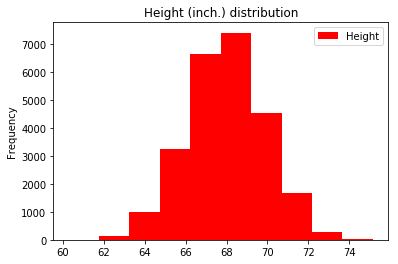

In [116]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [117]:
#Пункт 2

In [118]:
data.head (5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


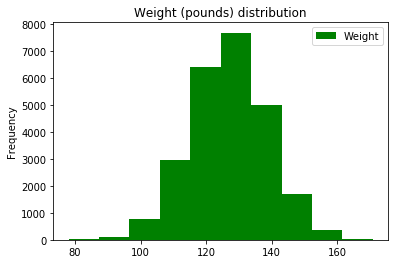

In [119]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (pounds) distribution')

In [120]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [121]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

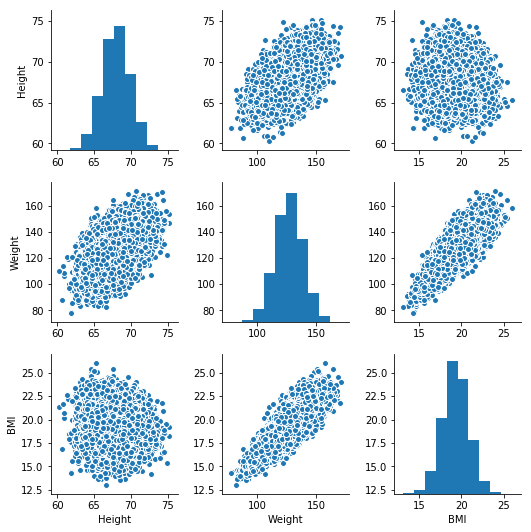

In [122]:
#Пункт 3
sns.pairplot(data)

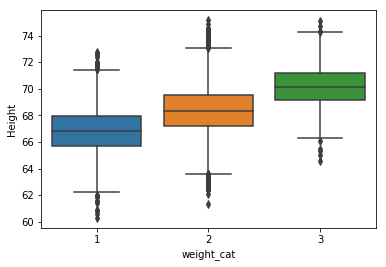

In [123]:
#Пункт 4
def weight_category(weight):
    group=0
    if weight<120:
        group=1
    elif weight>150:
        group=3
    else:
        group=2
    return group
data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(data['weight_cat'],data['Height'])

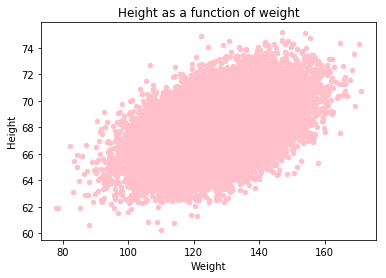

In [124]:
#Пункт 5
data.plot(x='Weight',y='Height', kind='scatter', 
           color='pink',  title='Height as a function of weight')

In [127]:
# Задание 2                              

In [268]:
#Пункт 6
def error (w1, w0, data):
    b=0.0
    for _, row in data.iterrows():
        a=(row["Height"]-(w0+w1*row['Weight']))**2
        b+=a
    return b

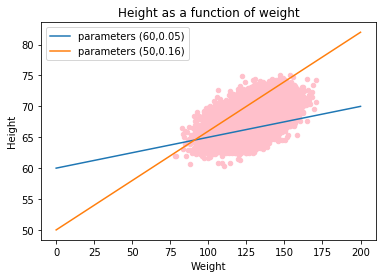

In [129]:
#Пункт 7
data.plot(x='Weight',y='Height', kind='scatter', 
           color='pink',  title='Height as a function of weight')
x = np.linspace(0,200,100)
a=60+0.05*x
b=50+0.16*x
plt.plot(x, a, label='parameters (60,0.05)')
plt.plot(x, b, label='parameters (50,0.16)')
plt.legend()
plt.show()

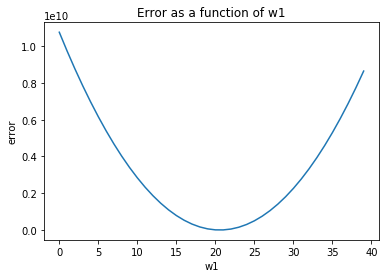

In [288]:
#Пункт 8
error_graph = []
for w1 in np.arange(-5, 5,0.25):
    error_row=error(w1,50,data)
    error_graph.append(error_row)
plt.plot(error_graph)
plt.xlabel("w1")
plt.ylabel('error')
plt.title ('Error as a function of w1')
plt.show()

     fun: 79512.217286994855
    nfev: 6
     nit: 5
 success: True
       x: 0.14109203728834385


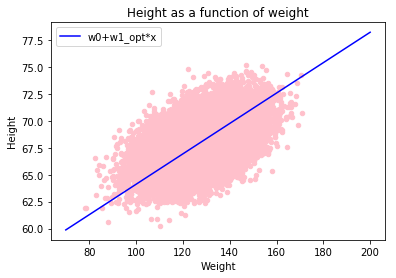

In [271]:
#Пункт 9
w0=50
w1_opt=minimize_scalar(error, bounds=(-5,5),args=(w0,data))
print w1_opt

def opt(x):
    d=50+w1_opt.x*x
    return d

data.plot(x='Weight',y='Height', kind='scatter', 
           color='pink',  title='Height as a function of weight')
x = np.linspace(70, 200)
plt.plot(x, opt(x),color='blue',label='50+0.14*x')
plt.legend()

In [272]:
from mpl_toolkits.mplot3d import Axes3D

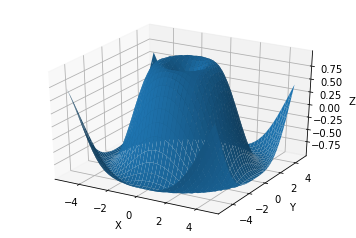

In [273]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

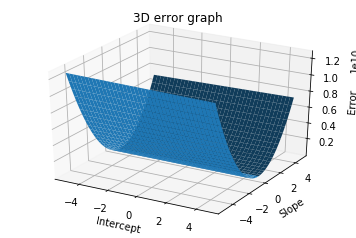

In [278]:
#Пункт 10
#3d error graph
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
w1, w0 = np.meshgrid(w1, w0)
Z = error(w1,w0,data)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(w0, w1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
ax.set_title ("3D error graph")
plt.show()

      fun: 67545.287087215474
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  0.33760443,  37.66763257])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 72
      nit: 12
   status: 0
  success: True
        x: array([ 57.57178736,   0.08200645])


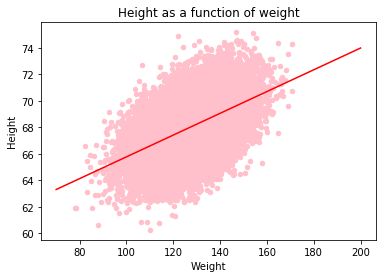

In [287]:
#Пункт 11
def f(w):
    f=error(w[1],w[0],data)
    return f

w_opt = minimize(f, [0.0, 0.0], method='L-BFGS-B', bounds=([-100, 100], [-5, 5]))
print w_opt

w0_opt = w_opt.x[0]
w1_opt = w_opt.x[1]
    
def g(x):
    return w0_opt + w1_opt * x

data.plot(x='Weight',y='Height', kind='scatter', 
           color='pink',  title='Height as a function of weight')
x = np.linspace(70, 200)
plt.plot(x, g(x),color='blue', label "w0_opt+w1_opt*x")
plt.legend()